In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

rng = np.random.RandomState(95)

In [2]:
dataset, _ = fetch_olivetti_faces(shuffle=True, random_state=rng, return_X_y=True)

In [3]:
dataset.shape

(400, 4096)

In [4]:
def show_first10(images, axs):
    scaler = MinMaxScaler()
    for j in range(10):
        images = images.copy()
        images = images.transpose((1, 0))
        images = scaler.fit_transform(images)
        images = images.transpose((1, 0))
        axs[j].imshow(images[j].reshape((64, 64)))

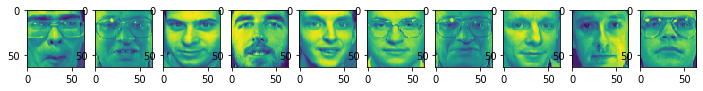

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))

show_first10(dataset, axs)

## PCA

In [6]:
n_components = 10

X = dataset

In [7]:
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=10)

In [8]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.23812743, 0.13993965, 0.0796861 , 0.0499833 , 0.03609845,
        0.03156944, 0.02426832, 0.02036399, 0.01958113, 0.01672121],
       dtype=float32), 0.65633893)

In [9]:
pca.components_.shape

(10, 4096)

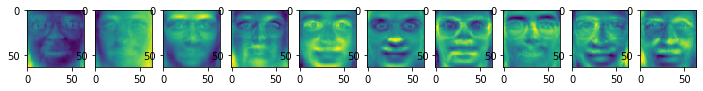

In [10]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))
show_first10(pca.components_, axs)

In [11]:
X_reduced = pca.transform(X)
X_reduced.shape

(400, 10)

In [12]:
X_restored = pca.inverse_transform(X_reduced)
X_restored.shape

(400, 4096)

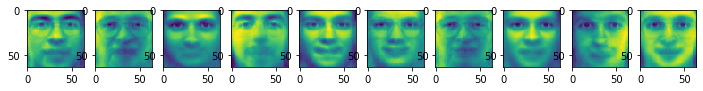

In [13]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))
show_first10(X_restored, axs)

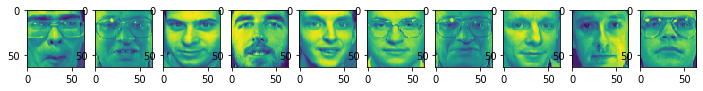

In [14]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))

show_first10(dataset, axs)